In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

# Read in CSVs
city_data_df = pd.read_csv('Resources/city_data.csv')
ride_data_df = pd.read_csv('Resources/ride_data.csv')

In [2]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [3]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [4]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [5]:
sum(city_data_df.type == "Urban")

66

In [6]:
sum(city_data_df.type == "Suburban")

36

In [7]:
sum(city_data_df.type =="Rural")

18

In [8]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [9]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [10]:
pyber_data_df = ride_data_df.merge(city_data_df, how='left', on='city')
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [11]:
urban_data_df = pyber_data_df[pyber_data_df.type == "Urban"]
suburban_data_df = pyber_data_df[pyber_data_df.type == "Suburban"]
rural_data_df = pyber_data_df[pyber_data_df.type == "Rural"]

In [12]:
urban_ride_count = urban_data_df.groupby(["city"]).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [13]:
suburban_ride_count = suburban_data_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_data_df.groupby(['city']).count()['ride_id']

In [14]:
urban_fare_mean = urban_data_df.groupby(['city']).mean()['fare']
urban_fare_mean.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [15]:
suburban_fare_mean = suburban_data_df.groupby(['city']).mean()['fare']
rural_fare_mean = rural_data_df.groupby(['city']).mean()['fare']

In [16]:
urban_driver_count = urban_data_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [17]:
suburban_driver_count = suburban_data_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_data_df.groupby(['city']).mean()['driver_count']

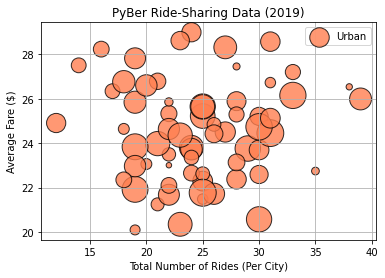

In [18]:
plt.scatter(urban_ride_count, urban_fare_mean,
            label="Urban", s= [10 * i for i in urban_driver_count],
            linewidths=1, edgecolors='k', c='coral', alpha=0.8)

plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid()

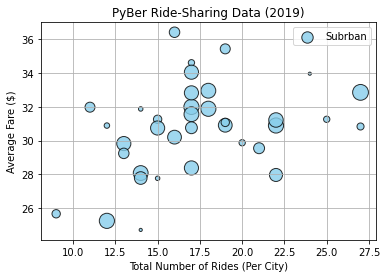

In [19]:
plt.scatter(suburban_ride_count, suburban_fare_mean,
            label="Subrban", s= [10 * i for i in suburban_driver_count],
            linewidths=1, edgecolors='k', c='skyblue', alpha=0.8)

plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid()

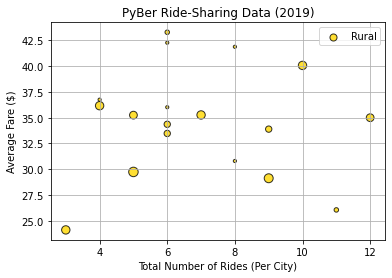

In [20]:
plt.scatter(rural_ride_count, rural_fare_mean,
            label="Rural", s= [10 * i for i in rural_driver_count],
            linewidths=1, edgecolors='k', c='gold', alpha=0.8)

plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid()

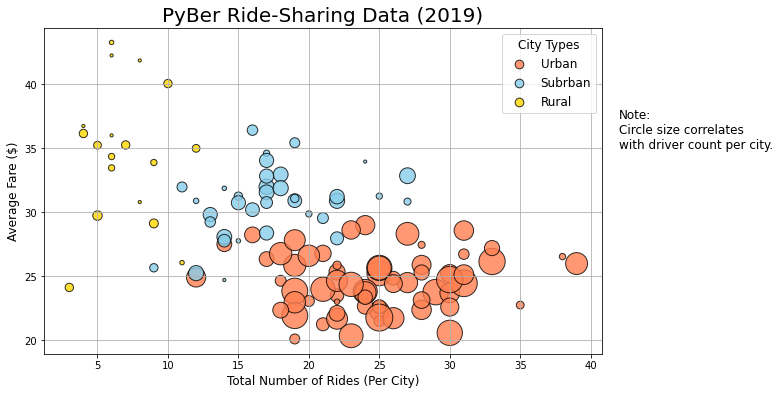

In [21]:
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_fare_mean,
            label="Urban", s= [10 * i for i in urban_driver_count],
            linewidths=1, edgecolors='k', c='coral', alpha=0.8)

plt.scatter(suburban_ride_count, suburban_fare_mean,
            label="Subrban", s= [10 * i for i in suburban_driver_count],
            linewidths=1, edgecolors='k', c='skyblue', alpha=0.8)

plt.scatter(rural_ride_count, rural_fare_mean,
            label="Rural", s= [10 * i for i in rural_driver_count],
            linewidths=1, edgecolors='k', c='gold', alpha=0.8)

plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.grid()

# Create a legend
lgnd = plt.legend(fontsize='12', mode='Expanded',
                 scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Add note about circle size
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize=12)

# Save the figure
plt.savefig('analysis/Fig1.png')

In [22]:
urban_data_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [23]:
suburban_data_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [24]:
rural_data_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [25]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [26]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [27]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [28]:
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [29]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [30]:
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [31]:
# Calculate the measures of central tendency for the ride count for the urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [32]:
# Calculate the measures of central tendency for the ride count for the suburban cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [33]:
# Calculate the measures of central tendency for the ride count for the rural cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [34]:
urban_fares = urban_data_df.fare
suburban_fares = suburban_data_df.fare
rural_fares = rural_data_df.fare

In [35]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [36]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is ${mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [37]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is ${mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [38]:
urban_drivers = urban_data_df.driver_count
suburban_drivers = suburban_data_df.driver_count
rural_drivers = rural_data_df.driver_count

In [39]:
# Calculate the measures of central tendency for the number of drivers for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers for urban cities is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers for urban cities is {median_urban_drivers}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers for urban cities is {mode_urban_drivers}.")

The mean number of drivers for urban cities is 36.68.
The median number of drivers for urban cities is 37.0.
The mode number of drivers for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [40]:
# Calculate the measures of central tendency for the number of drivers for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for suburban cities is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers for suburban cities is {median_suburban_drivers}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers for suburban cities is {mode_suburban_drivers}.")

The mean number of drivers for suburban cities is 13.71.
The median number of drivers for suburban cities is 16.0.
The mode number of drivers for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [41]:
# Calculate the measures of central tendency for the number of drivers for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers for rural cities is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers for rural cities is {median_rural_drivers}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers for rural cities is {mode_rural_drivers}.")

The mean number of drivers for rural cities is 4.30.
The median number of drivers for rural cities is 4.0.
The mode number of drivers for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


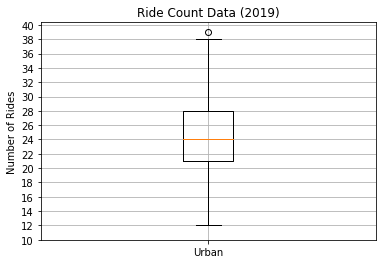

In [42]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()

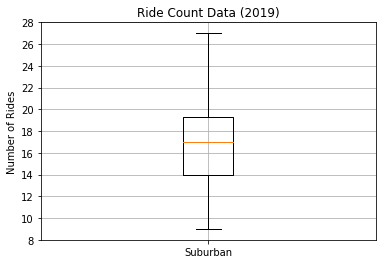

In [43]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(8, 29, step=2.0))
ax.grid()

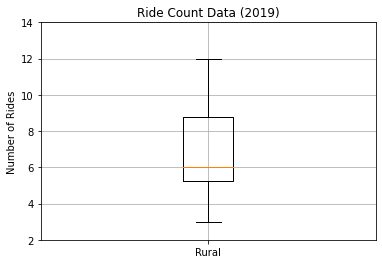

In [44]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(2, 15, step=2.0))
ax.grid()

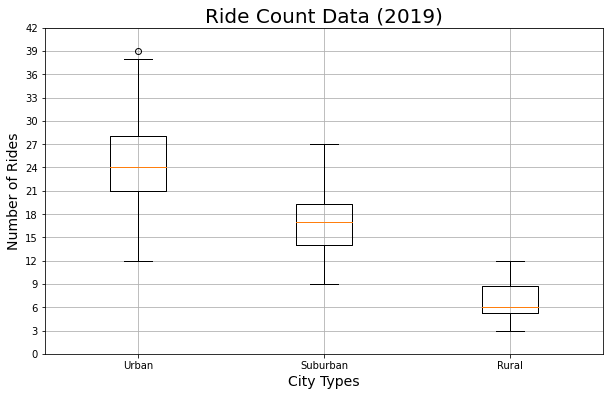

In [45]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_xlabel('City Types', fontsize=14)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure.
plt.savefig('analysis/Fig2.png')

In [46]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


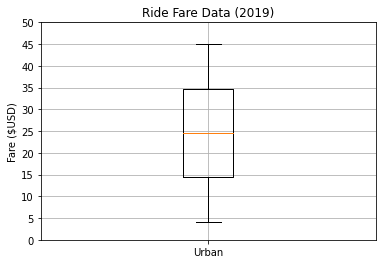

In [47]:
# Create a box plot for Urban fares
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

#Format the box plot
ax.set_ylabel('Fare ($USD)')
ax.set_title('Ride Fare Data (2019)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()

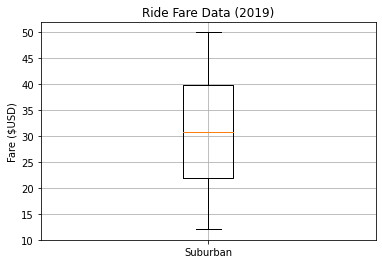

In [48]:
# Create a box plot for Suburban fares
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

#Format the box plot
ax.set_ylabel('Fare ($USD)')
ax.set_title('Ride Fare Data (2019)')
ax.set_yticks(np.arange(10, 51, step=5.0))
ax.grid()

# suburban_fares.describe()

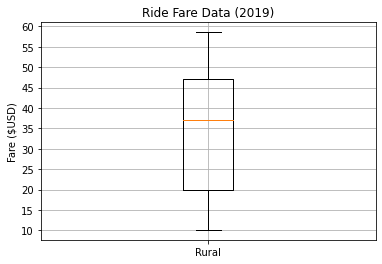

In [49]:
# Create a box plot for Rural fares
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

#Format the box plot
ax.set_ylabel('Fare ($USD)')
ax.set_title('Ride Fare Data (2019)')
ax.set_yticks(np.arange(10, 61, step=5.0))
ax.grid()

# rural_fares.describe()

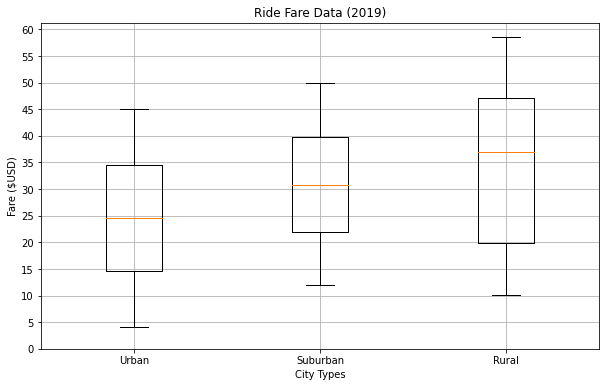

In [50]:
# Add all fares box plots to the same graph
x_labels = ['Urban', 'Suburban', 'Rural']
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fares_data, labels=x_labels)
ax.set_ylabel('Fare ($USD)')
ax.set_xlabel('City Types')
ax.set_title('Ride Fare Data (2019)')
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()

# Save the figure
plt.savefig('analysis/Fig3.png')

Text(0.5, 1.0, 'Driver Data (2019)')

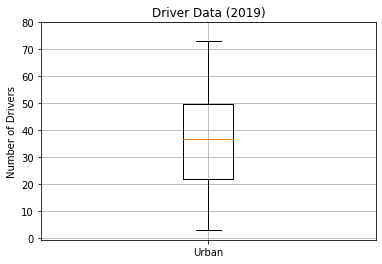

In [51]:
# Create Urban driver count box plot
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_driver_count, labels=x_labels)
ax.set_ylabel('Number of Drivers')
ax.grid()
ax.set_yticks(np.arange(0, 81, step=10.0))
ax.set_title('Driver Data (2019)')

# urban_driver_count.describe()

Text(0.5, 1.0, 'Driver Data (2019)')

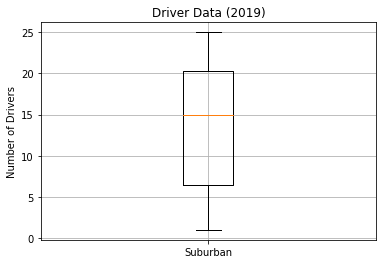

In [52]:
# Create suburban driver count box plot
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_driver_count, labels=x_labels)
ax.set_ylabel('Number of Drivers')
ax.grid()
ax.set_yticks(np.arange(0, 26, step=5.0))
ax.set_title('Driver Data (2019)')

# suburban_driver_count.describe()

Text(0.5, 1.0, 'Driver Data (2019)')

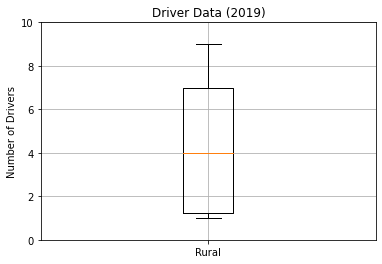

In [53]:
# Create rural driver count box plot
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_driver_count, labels=x_labels)
ax.set_ylabel('Number of Drivers')
ax.grid()
ax.set_yticks(np.arange(0, 11, step=2.0))
ax.set_title('Driver Data (2019)')

# rural_driver_count.describe()

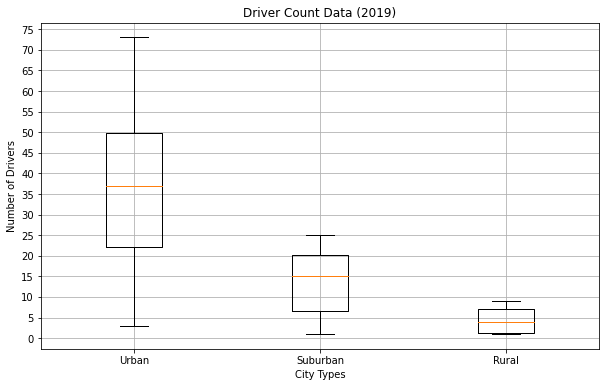

In [54]:
# Combine box plots
x_labels = ['Urban', 'Suburban', 'Rural']
driver_count = [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_count, labels=x_labels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_xlabel('City Types')
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()

# Save the figure
plt.savefig('analysis/Fig4.png')

In [57]:
# Calculate the percentage of fares by city type
fare_percents = pyber_data_df.groupby(['type']).sum()['fare'] / pyber_data_df.fare.sum() * 100
# fare_percents

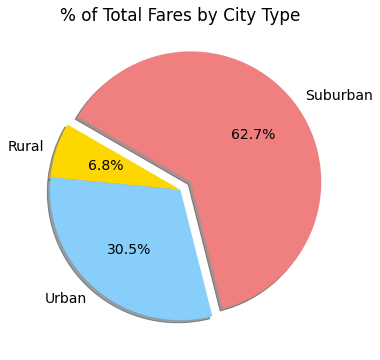

In [69]:
# Dependency
import matplotlib as mpl

# Create the pie chart
plt.subplots(figsize=(10,6))
plt.pie(fare_percents,
    labels=['Rural', 'Urban', 'Suburban'],
    colors=['gold', 'lightskyblue', 'lightcoral'],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True,
    startangle=150)
plt.title('% of Total Fares by City Type')
mpl.rcParams['font.size'] = 14

# Save the figure
plt.savefig('analysis/Fig5.png')

In [70]:
ride_percents = pyber_data_df.groupby(['type']).count()['ride_id'] / pyber_data_df.ride_id.count() * 100

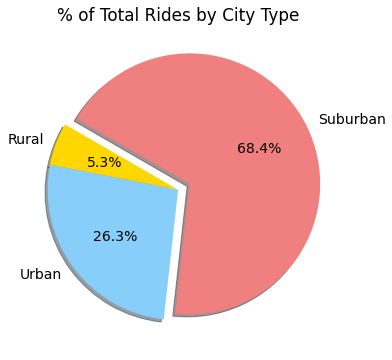

In [71]:
# Create the pie chart
plt.subplots(figsize=(10,6))
plt.pie(ride_percents,
    labels=['Rural', 'Urban', 'Suburban'],
    colors=['gold', 'lightskyblue', 'lightcoral'],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True,
    startangle=150)
plt.title('% of Total Rides by City Type')
mpl.rcParams['font.size'] = 14

# Save the figure
plt.savefig('analysis/Fig6.png')